<h1>Análise da base</h1>
A base de dados é composta por duas abas. Tendo a primeira abas de ocorrências e a segunda de vítimas. Em ambas as abas possuem dois o estado (Utilizei o excel de estado), tipo de crime, ano, mês. Na de ocorrências possuem as ocorrências e a segunda aba possue o numero de vítimas.
*   UF - Qualitativo nominal
*   Tipo Crime - Qualitativo nominal
*   Ano - Qualitativo ordinal
*   Mes - Qualitativo ordinal
*   Ocorrência,Vítimas  - Quantitativo 
Acima foi feito uma analise sobre os tipos dos dados.






In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn import preprocessing
import numpy as np

In [23]:
data_estados = pd.ExcelFile('leitura.xlsx')
data_estados_ocorrencias = pd.read_excel(data_estados, 'Ocorrências')
data_estados_vítimas = pd.read_excel(data_estados, 'Vítimas')
data_estados_ocorrencias.head(5)

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2015,janeiro,6
1,Acre,Furto de veículo,2015,janeiro,0
2,Acre,Homicídio doloso,2015,janeiro,13
3,Acre,Lesão corporal seguida de morte,2015,janeiro,0
4,Acre,Roubo a instituição financeira,2015,janeiro,0


Na parte de baixo estou verificando se a base está com dados faltantes ou se está completa.

In [37]:
count_ = data_estados_ocorrencias.count()
count_

UF             17548
Tipo Crime     17548
Ano            17548
Mês            17548
Ocorrências    17548
dtype: int64

In [36]:
count_ = data_estados_vítimas.count()
count_

UF            5458
Tipo Crime    5458
Ano           5458
Mês           5458
Vítimas       5458
dtype: int64

Pela análise acima está bem balanceado, não existe dados faltantes.

<h1>Análise de gráfico</h1>

<h2>Análise entre atributos qualitativos x quantitativos</h2>

Proximo passo é fazer algumas analises de graficos para saber a relação dos atributos. Primeiramente será feito uma relação entre dois atributos qualitativos x quantitativos.

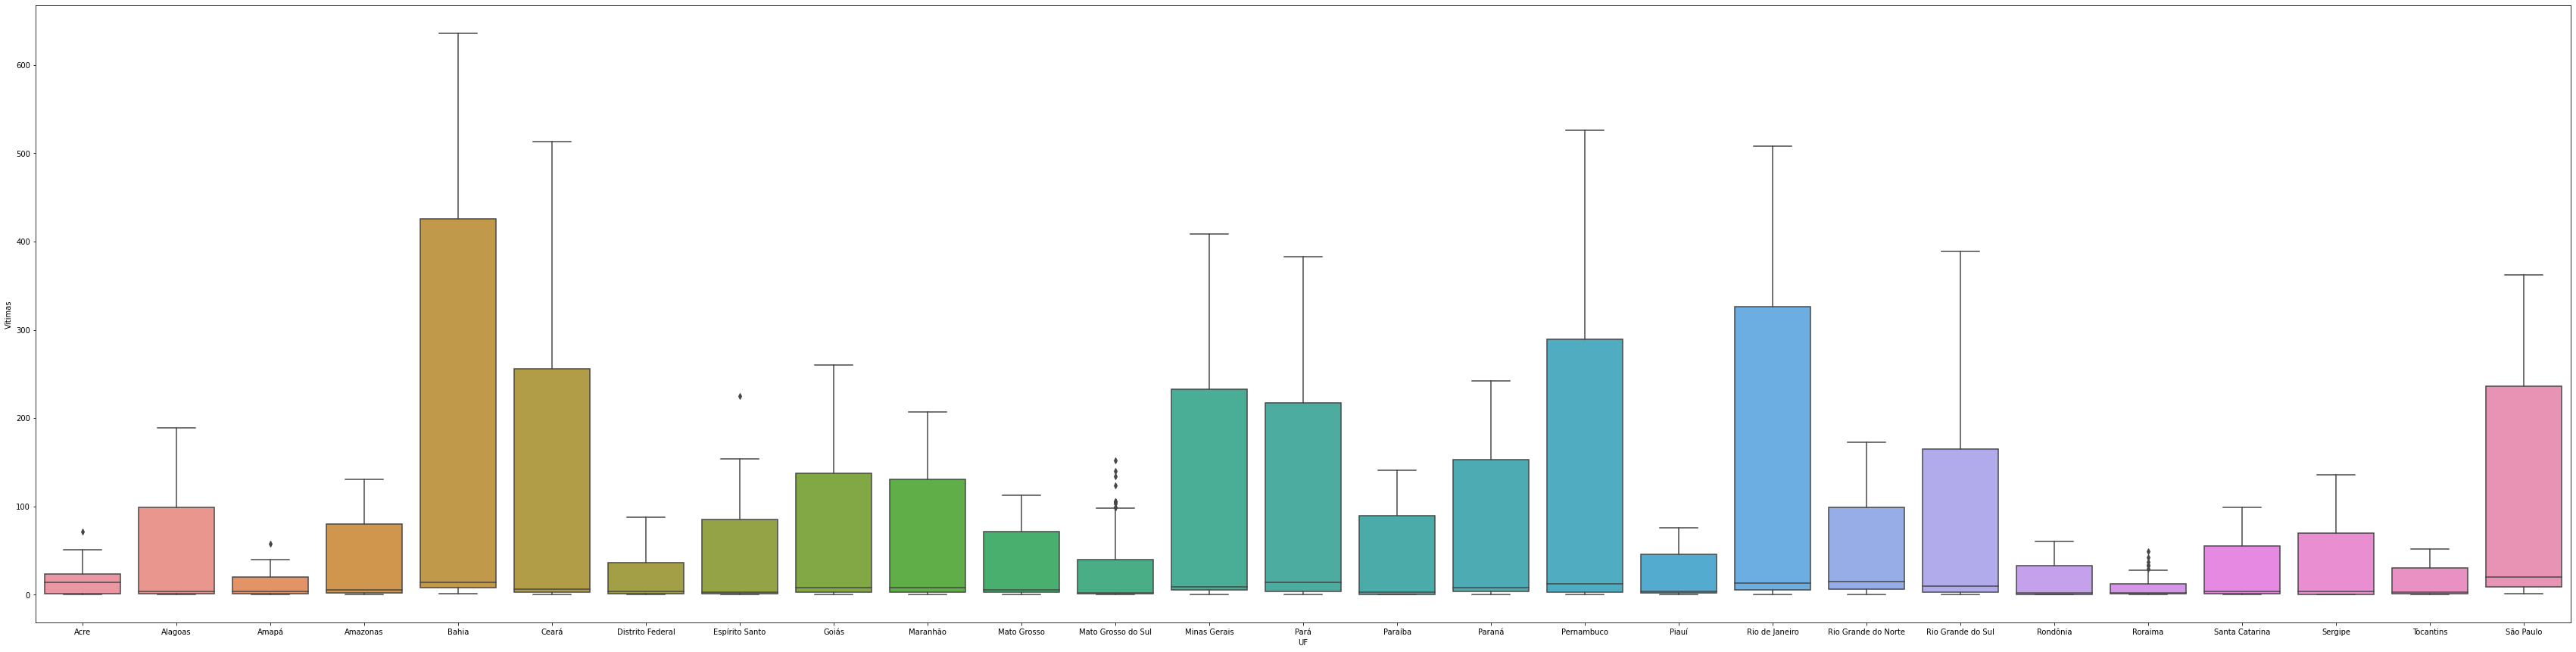

In [46]:
plt.figure(figsize=(60,15))
ax = sns.boxplot(x="UF", y="Vítimas", data=data_estados_vítimas)

Como pode ter uma analise do gráfico acima, o maior estado que tem numeros de vítimas é a Bahia seguido logo do Rio de Janeiro.

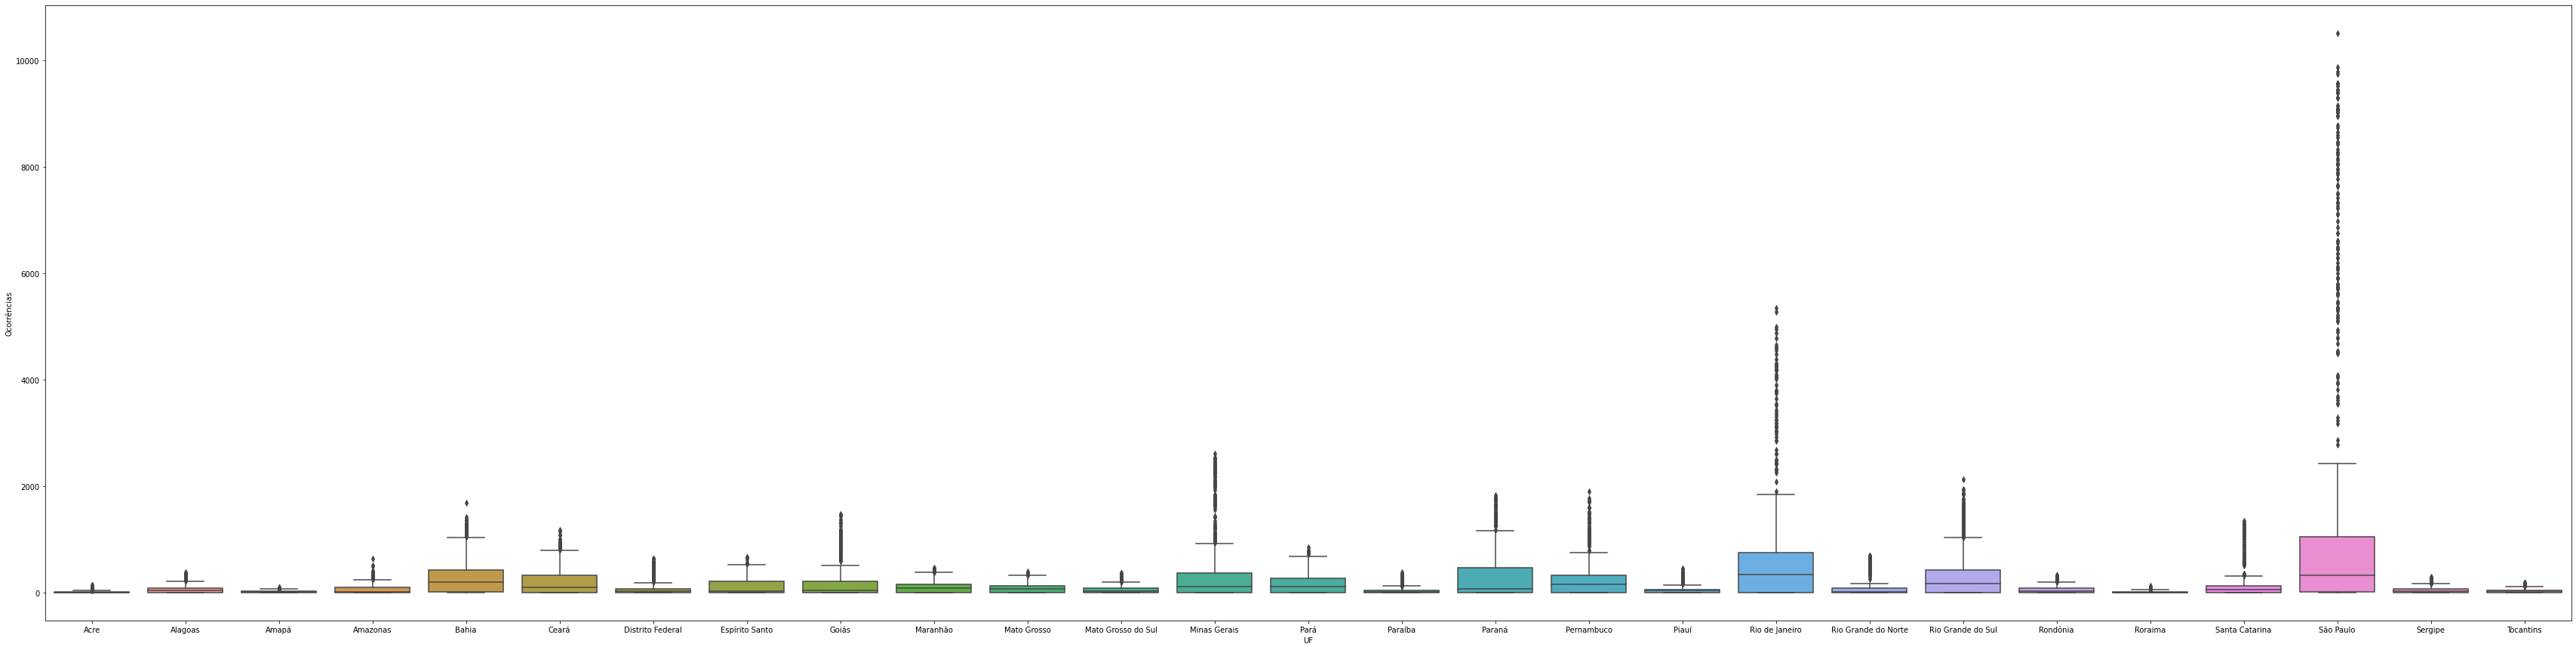

In [47]:
plt.figure(figsize=(60,15))
ax = sns.boxplot(x="UF", y="Ocorrências", data=data_estados_ocorrencias)

Como pode ter uma analise do gráfico acima, o maior estado que tem numeros de **OCORRÊNCIAS** é São Paulo , seguido do Rio de Janeiro. 

Será feito agora a analise do dado de (Ocorrência ou Vitima) e mês, que são respectivamentes Quantitativo e Qualitativo, continuando o raciocínio anterior.

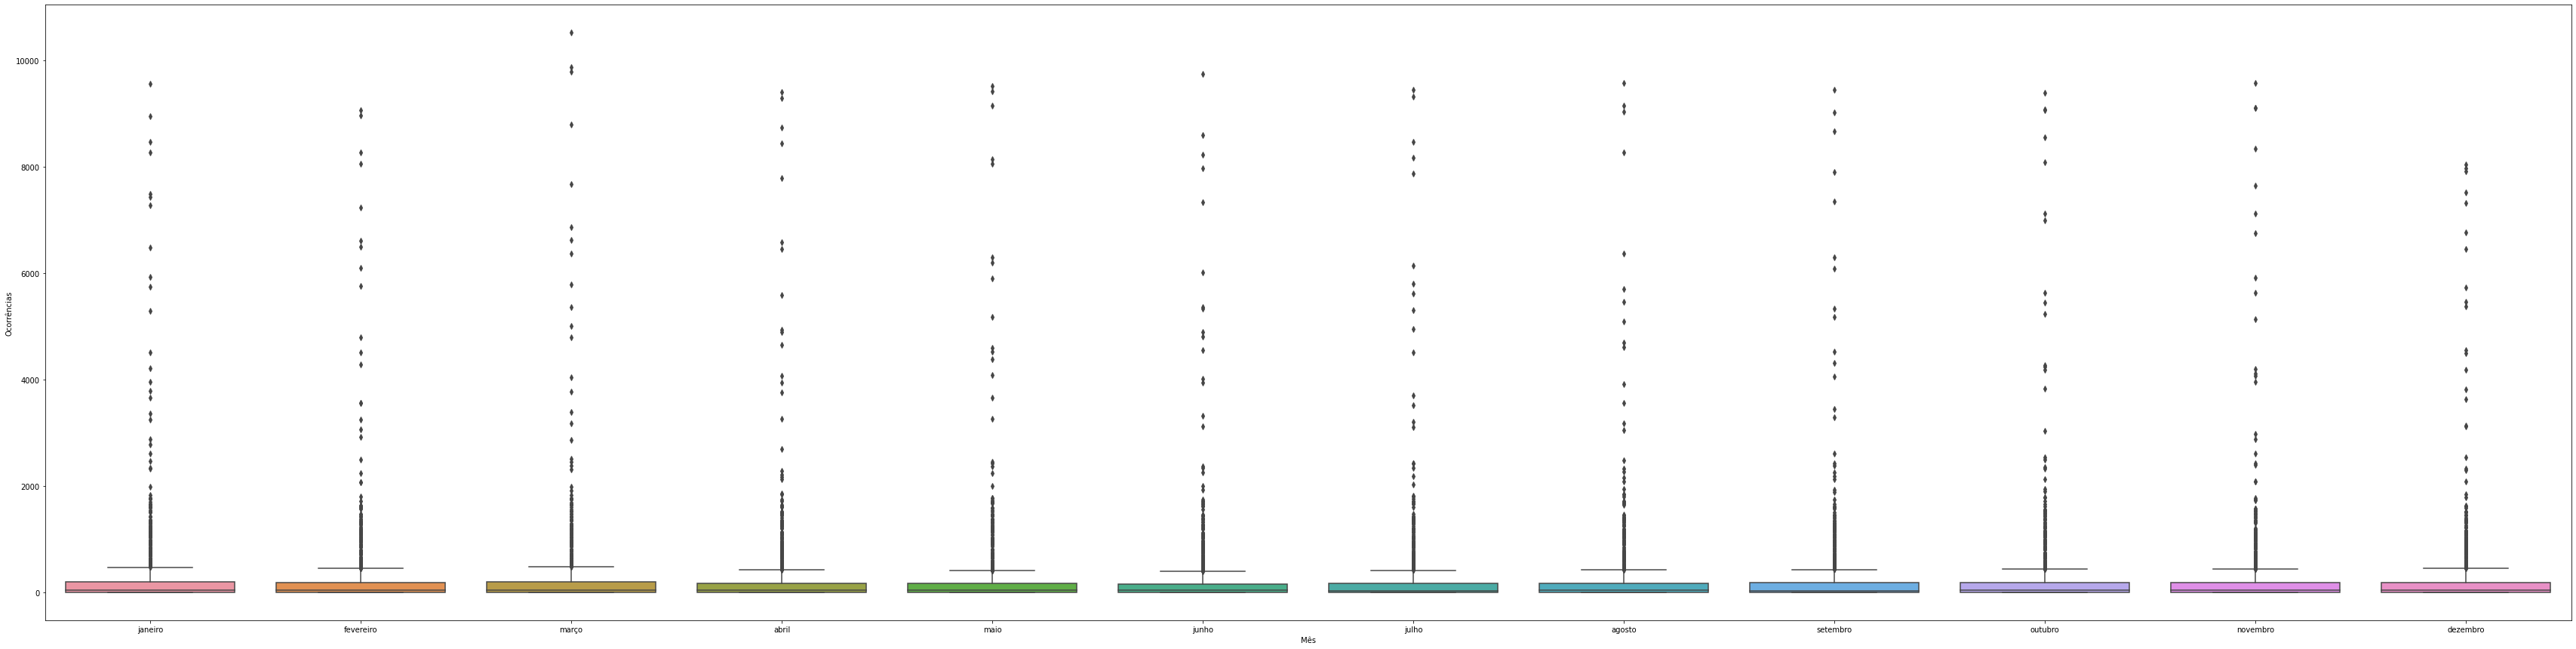

In [48]:
plt.figure(figsize=(60,15))
ax = sns.boxplot(x="Mês", y="Ocorrências", data=data_estados_ocorrencias)

Como pode se analisar a partir do gráfico acima, existe muitos outliers no gráfico, existe um mês que existe um outlier maior que os outros, que é março, o qual existe mais de 10000, ocorrências, sendo o mês que possui mais ocorrência durante esses anos.

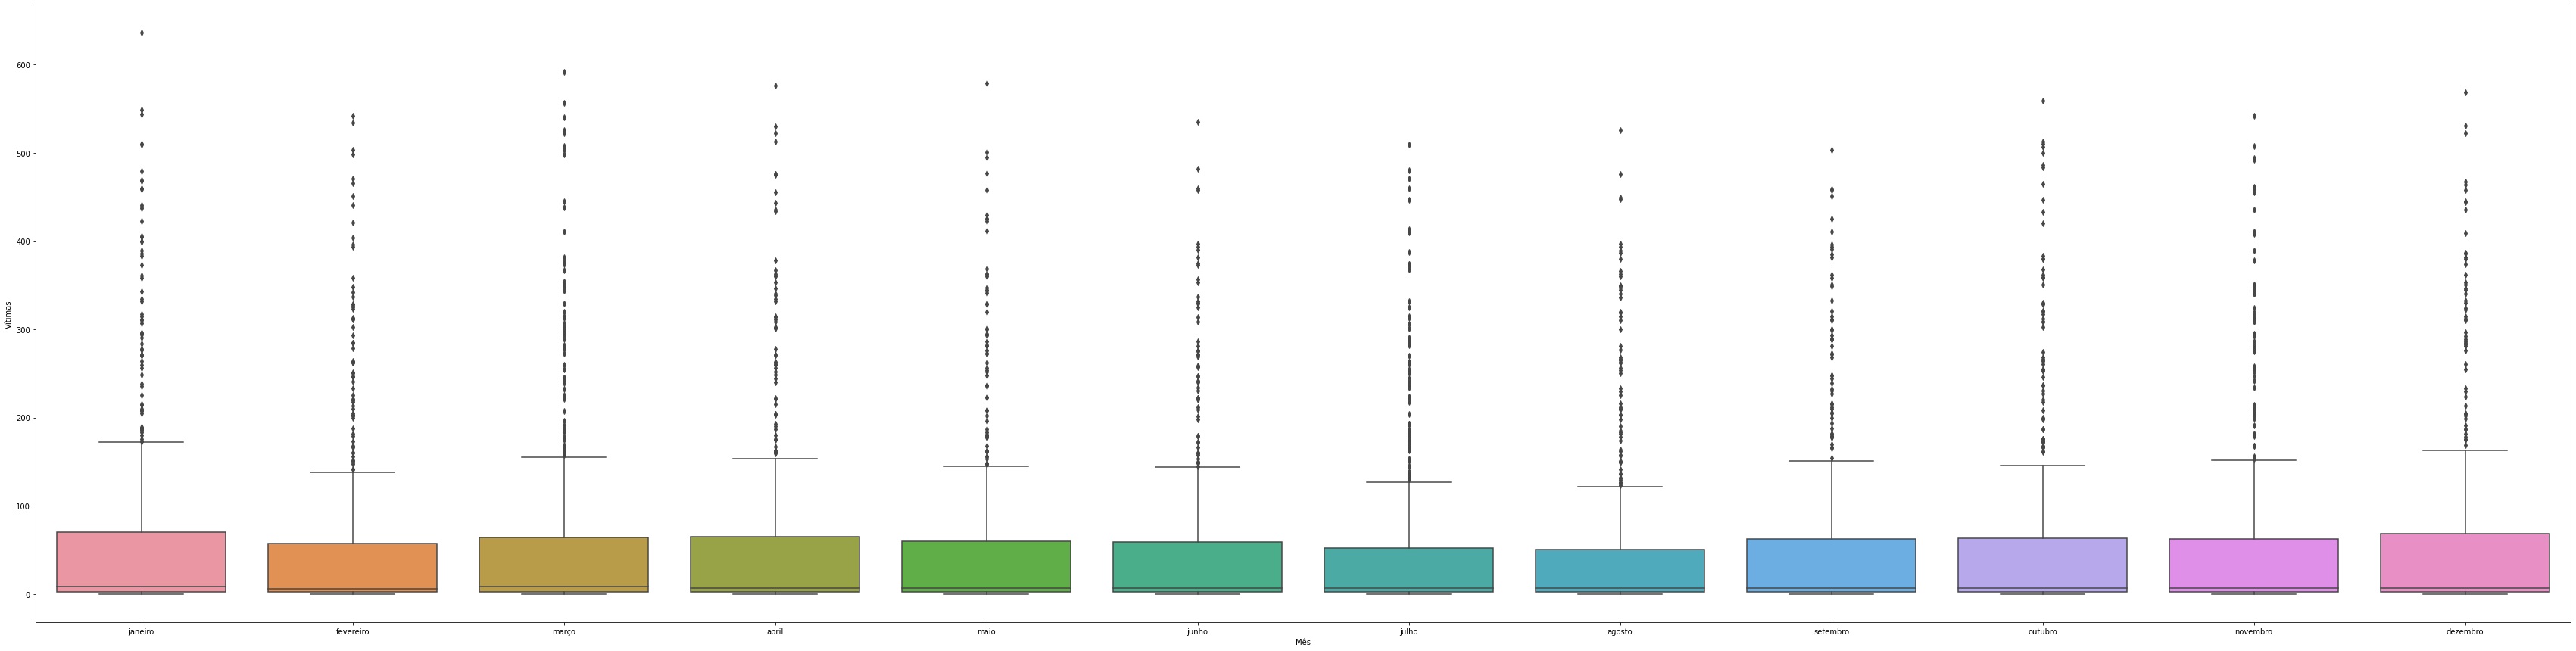

In [49]:
plt.figure(figsize=(60,15))
ax = sns.boxplot(x="Mês", y="Vítimas", data=data_estados_vítimas)

Como analisado anteriormente, existe bastante outliers tambem nesse gráfico. Porém ja existe uma diferença perceptível nas barras. Sendo janeiro o maior mês com número de vitimas entre esses anos.

<h1>Transformações</h1>

Nessa seção será feita algumas transformações nas bases, como por exemplo, o dummies de alguns atributos, como Mês, Ano (Pois ano é um atributo qualitativo e não quantitativo) e o tipo de crime. E normalizar os dados de vítimas e ocorrencias. Com o código abaixo: (Será feito o dummie do data_estados_vítimas e para ocorrências)

In [56]:
# Dummie em vítimas primeiro
data_estados_vítimas = pd.get_dummies(data_estados_vítimas, columns=["Mês", "Ano", "Tipo Crime"])
data_estados_vítimas

,UF,Vítimas,Mês_abril,Mês_agosto,Mês_dezembro,Mês_fevereiro,Mês_janeiro,Mês_julho,Mês_junho,Mês_maio,Mês_março,Mês_novembro,Mês_outubro,Mês_setembro,Ano_2015,Ano_2016,Ano_2017,Ano_2018,Ano_2019,Ano_2020,Ano_2021,Tipo Crime_Homicídio doloso,Tipo Crime_Lesão corporal seguida de morte,Tipo Crime_Roubo seguido de morte (latrocínio)
0,Acre,13,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,Acre,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,Acre,16,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,Acre,22,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,Acre,15,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,Sergipe,49,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
5454,Sergipe,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5455,Sergipe,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5456,Tocantins,37,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [57]:
# Dummie em ocorrências
data_estados_ocorrencias = pd.get_dummies(data_estados_ocorrencias, columns=["Mês", "Ano", "Tipo Crime"])
data_estados_ocorrencias

,UF,Ocorrências,Mês_abril,Mês_agosto,Mês_dezembro,Mês_fevereiro,Mês_janeiro,Mês_julho,Mês_junho,Mês_maio,Mês_março,Mês_novembro,Mês_outubro,Mês_setembro,Ano_2015,Ano_2016,Ano_2017,Ano_2018,Ano_2019,Ano_2020,Ano_2021,Tipo Crime_Estupro,Tipo Crime_Furto de veículo,Tipo Crime_Homicídio doloso,Tipo Crime_Lesão corporal seguida de morte,Tipo Crime_Roubo a instituição financeira,Tipo Crime_Roubo de carga,Tipo Crime_Roubo de veículo,Tipo Crime_Roubo seguido de morte (latrocínio),Tipo Crime_Tentativa de homicídio
0,Acre,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Acre,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Acre,13,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Acre,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Acre,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17543,Tocantins,101,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
17544,Tocantins,35,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
17545,Tocantins,55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
17546,Tocantins,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


Próximo passo é fazer a normalização das ocorrências e vítimas:

In [61]:
##Data estados ocorrências
ocorrencias_column = data_estados_ocorrencias['Ocorrências'].values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array_ocorr = min_max_scaler.fit_transform(ocorrencias_column[:, np.newaxis])
data_estados_ocorrencias['Ocorrências'] = scaled_array_ocorr
data_estados_ocorrencias

,UF,Ocorrências,Mês_abril,Mês_agosto,Mês_dezembro,Mês_fevereiro,Mês_janeiro,Mês_julho,Mês_junho,Mês_maio,Mês_março,Mês_novembro,Mês_outubro,Mês_setembro,Ano_2015,Ano_2016,Ano_2017,Ano_2018,Ano_2019,Ano_2020,Ano_2021,Tipo Crime_Estupro,Tipo Crime_Furto de veículo,Tipo Crime_Homicídio doloso,Tipo Crime_Lesão corporal seguida de morte,Tipo Crime_Roubo a instituição financeira,Tipo Crime_Roubo de carga,Tipo Crime_Roubo de veículo,Tipo Crime_Roubo seguido de morte (latrocínio),Tipo Crime_Tentativa de homicídio
0,Acre,0.000570,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Acre,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Acre,0.001236,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Acre,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Acre,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17543,Tocantins,0.009603,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
17544,Tocantins,0.003328,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
17545,Tocantins,0.005229,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
17546,Tocantins,0.000095,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [62]:
##Data estados vítimas
ocorrencias_column = data_estados_vítimas['Vítimas'].values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array_ocorr = min_max_scaler.fit_transform(ocorrencias_column[:, np.newaxis])
data_estados_vítimas['Vítimas'] = scaled_array_ocorr
data_estados_vítimas

,UF,Vítimas,Mês_abril,Mês_agosto,Mês_dezembro,Mês_fevereiro,Mês_janeiro,Mês_julho,Mês_junho,Mês_maio,Mês_março,Mês_novembro,Mês_outubro,Mês_setembro,Ano_2015,Ano_2016,Ano_2017,Ano_2018,Ano_2019,Ano_2020,Ano_2021,Tipo Crime_Homicídio doloso,Tipo Crime_Lesão corporal seguida de morte,Tipo Crime_Roubo seguido de morte (latrocínio)
0,Acre,0.020440,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,Acre,0.015723,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,Acre,0.025157,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,Acre,0.034591,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,Acre,0.023585,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,Sergipe,0.077044,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
5454,Sergipe,0.003145,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5455,Sergipe,0.001572,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5456,Tocantins,0.058176,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
